# Exploring AT-TPC image data for pix2pix training

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py

Importing summer school data. Code modified from Sidney Knowles.

I moved the data files into `notebooks/data/ATTPC_46Ar` after retrieving them.

In [14]:
def load_attpc_data():
    """
    Loads in the AT-TPC data.

    Returns:
        A tuple of the form ((real_features, real_targets), (simulated_features, simulated_targets))
    """
    
    
    #simulated_path = tf.keras.utils.get_file('simulated-attpc-data.h5', origin=simulated_data_origin)
    #real_path = tf.keras.utils.get_file('real-attpc-data.h5', origin=real_data_origin)
    cwd = os.getcwd()
    data_root = cwd+"/data/ATTPC_46Ar/"
    simulated_path = data_root + "images_without_noise.h5"
    real_path = data_root + "real-attpc-events.h5"
    #print(simulated_path, real_path)
    
    with h5py.File(simulated_path, 'r') as sim:
        print(sim.keys())
        simulated_features = sim['train_features'][:3000,:,:,0]
        simulated_targets = sim['train_targets'][:3000]

    with h5py.File(real_path, 'r') as real:
        real_features = real['features'][:]
        real_targets = real['targets'][:]

    return (real_features, real_targets), (simulated_features, simulated_targets)

In [15]:
(real_features, real_targets), (simulated_features, simulated_targets) = load_attpc_data()

<KeysViewHDF5 ['test_features', 'test_targets', 'train_features', 'train_targets']>


In [16]:
print(real_features.shape)
print(simulated_features.shape)

(2689, 128, 128)
(3000, 128, 128)


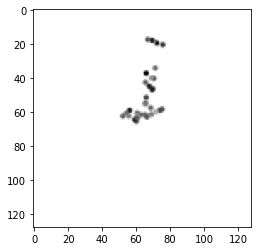

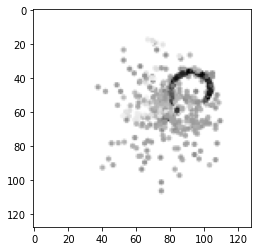

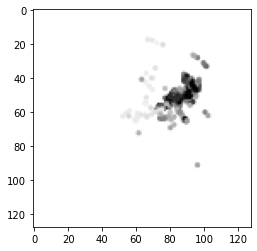

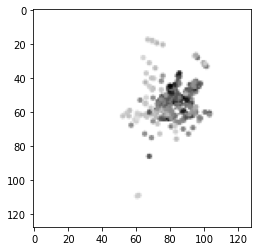

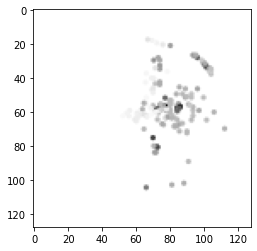

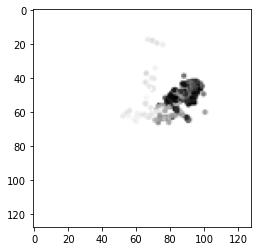

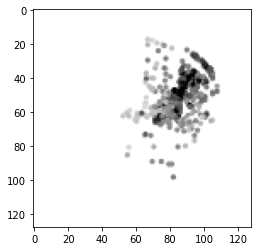

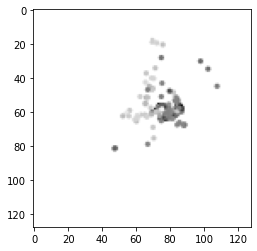

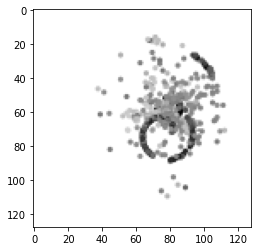

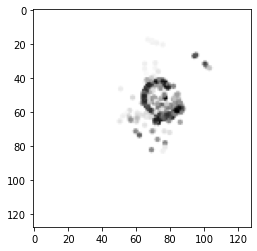

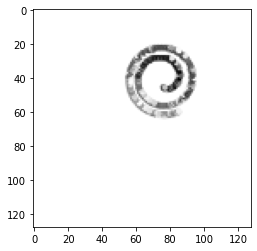

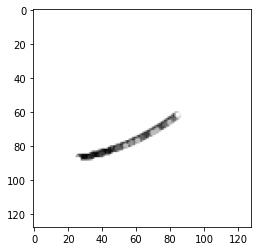

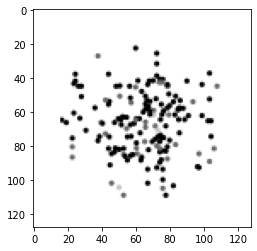

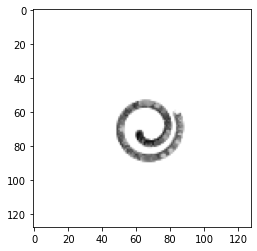

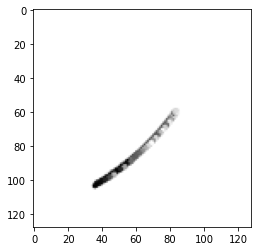

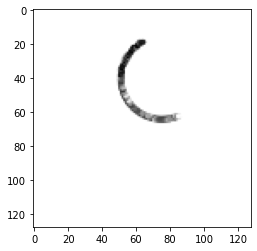

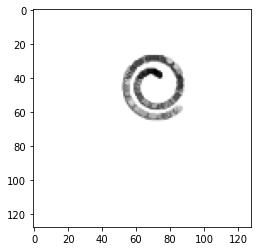

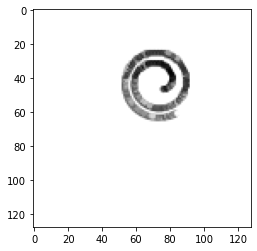

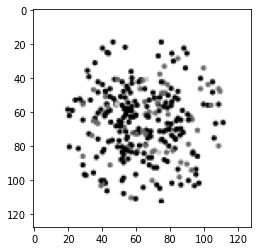

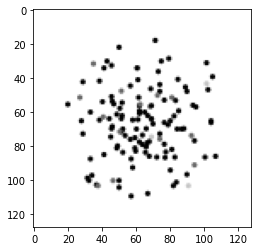

In [17]:
for i in range(10):
    plt.imshow(real_features[i], cmap="gray")
    plt.show()
    
for i in range(10):
    plt.imshow(simulated_features[i], cmap="gray")
    plt.show()

## FLUX. The sim data is noisy. Must find clean data. Update: found! And code is modified.